In [2]:
import matplotlib.pyplot as plt
import numpy as np
from trajectory_matching import TrajectoryMatching
from misc import mean_squared_displacement as msd, density, plot_1component

def basis_function(x, p):
    return np.sign(x) * np.abs(x) ** p

PATH = "/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/hardener/"

steps_between_points = 40
configurations = 500

x1 = np.linspace(6.75, 18, 10000)
x2 = np.linspace(5.75, 18, 10000)
x_fit = np.linspace(6.5, 25, 10000)
x_plot = np.linspace(5.7, 18, 10000)

In [3]:
T = 350
print(f"T = {T}\n-------------")

outfile = f"/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/hardener/hardener_npt_{T}.out"
params = [-2, -3]
hardener_tm = TrajectoryMatching(outfile_path=outfile, basis=basis_function, basis_parameters=params,
                                   simulation_timestep=0.5, cutoff=50, system_style='molecular',
                                   every_n_from_output=steps_between_points, timesteps_in_fit=configurations)
hardener_tm.prepare_training_data(only_r=True)
density(hardener_tm)
print("\n")

r_npt_350, g_ave_npt_350 = hardener_tm.plot_rdf(outfile_path=f"/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/hardener/hardener_rdf_npt_{T}.png", plot=False)
msd_npt_350 = msd(hardener_tm.r)


outfile = f"/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/hardener/hardener_dpd_npt_{T}_small.out"
params = [-2, -3]
hardener_tm = TrajectoryMatching(outfile_path=outfile, basis=basis_function, basis_parameters=params,
                                   simulation_timestep=0.5, cutoff=50, system_style='atomic',
                                   every_n_from_output=steps_between_points, timesteps_in_fit=configurations)
hardener_tm.prepare_training_data(only_r=True)
density(hardener_tm)
print("\n")
r_dpd_npt_350, g_ave_dpd_npt_350 = hardener_tm.plot_rdf(outfile_path=f"/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/hardener/hardener_dpd_rdf_npt_{T}.png", plot=False)
msd_dpd_npt_350 = msd(hardener_tm.r)


T = 400
print(f"T = {T}\n-------------")

outfile = f"/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/hardener/hardener_npt_{T}.out"
params = [-2, -3]
hardener_tm = TrajectoryMatching(outfile_path=outfile, basis=basis_function, basis_parameters=params,
                                   simulation_timestep=0.5, cutoff=50, system_style='molecular',
                                   every_n_from_output=steps_between_points, timesteps_in_fit=configurations)
hardener_tm.prepare_training_data(only_r=True)
density(hardener_tm)
print("\n")

r_npt_400, g_ave_npt_400 = hardener_tm.plot_rdf(outfile_path=f"/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/hardener/hardener_rdf_npt_{T}.png", plot=False)
msd_npt_400 = msd(hardener_tm.r)

outfile = f"/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/hardener/hardener_dpd_npt_{T}_small.out"
params = [-2, -3]
hardener_tm = TrajectoryMatching(outfile_path=outfile, basis=basis_function, basis_parameters=params,
                                   simulation_timestep=0.5, cutoff=50, system_style='atomic',
                                   every_n_from_output=steps_between_points, timesteps_in_fit=configurations)
hardener_tm.prepare_training_data(only_r=True)
density(hardener_tm)
print("\n")

r_dpd_npt_400, g_ave_dpd_npt_400 = hardener_tm.plot_rdf(outfile_path=f"/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/hardener/hardener_dpd_rdf_npt_{T}.png", plot=False)
msd_dpd_npt_400 = msd(hardener_tm.r)

T = 350
-------------


loading data: 100%|██████████| 500/500 [01:24<00:00,  5.93it/s]


preparing input
density: 0.5958035651749449 g/cm3




loading data: 100%|██████████| 500/500 [00:04<00:00, 100.61it/s]


preparing input
density: 0.5686744285446911 g/cm3


T = 400
-------------


loading data: 100%|██████████| 500/500 [01:27<00:00,  5.74it/s]


preparing input
density: 0.47416657971525444 g/cm3




loading data: 100%|██████████| 500/500 [00:02<00:00, 246.74it/s]


preparing input
density: 0.474030755056677 g/cm3




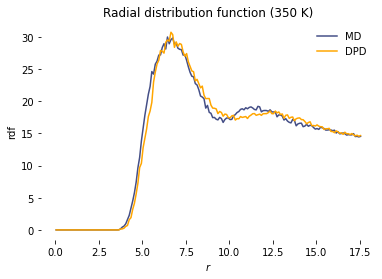

In [4]:
fig, ax = plt.subplots()
ax.plot(r_npt_350, g_ave_npt_350, label='MD', color='#444e86')
ax.plot(r_dpd_npt_350, g_ave_dpd_npt_350, label='DPD', color='#ffa600')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.legend(frameon=False)
ax.set_title("Radial distribution function (350 K)")
ax.set_xlabel(r"$r$")
ax.set_ylabel("rdf")
plt.savefig(PATH + "hardener_npt_rdf_350.png")

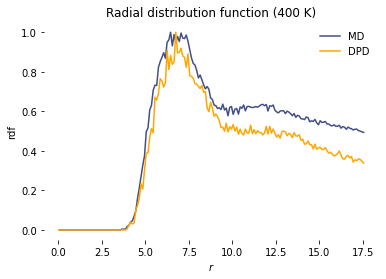

In [5]:
fig, ax = plt.subplots()
ax.plot(r_npt_400, g_ave_npt_400 / max(g_ave_npt_400), label='MD', color='#444e86')
ax.plot(r_dpd_npt_400, g_ave_dpd_npt_400 / max(g_ave_dpd_npt_400), label='DPD', color='#ffa600')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.legend(frameon=False)
ax.set_title("Radial distribution function (400 K)")
ax.set_xlabel(r"$r$")
ax.set_ylabel("rdf")
plt.savefig(PATH + "hardener_npt_rdf_400.png")

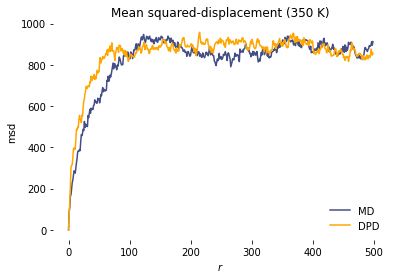

In [6]:
fig, ax = plt.subplots()
ax.plot(msd_npt_350, label='MD', color='#444e86')
ax.plot(msd_dpd_npt_350, label='DPD', color='#ffa600')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.legend(frameon=False)
ax.set_title("Mean squared-displacement (350 K)")
ax.set_xlabel(r"$r$")
ax.set_ylabel("msd")
plt.savefig(PATH + "hardener_npt_msd_350.png")

